In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [5]:
Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

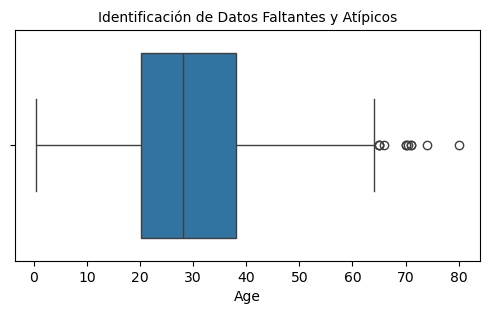

In [11]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [13]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())

Cantidad de Registros con cero en Survived:  549
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Parch:  678


In [15]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Survived']=Datos['Survived'].replace(0,Datos['Survived'].mean())
Datos['Pclass']=Datos['Pclass'].replace(0,Datos['Pclass'].mean())
Datos['Parch']=Datos['Parch'].replace(0,Datos['Parch'].mean())

In [17]:
#Revisión nuevamente de los datos faltantes

print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())

Cantidad de Registros con cero en Survived:  0
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Parch:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

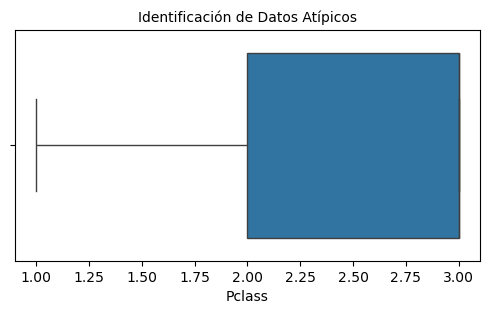

In [21]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [23]:

#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Pclass']<nivel_minimo)|(Datos['Pclass']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 891


In [25]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Pclass']<nivel_maximo)&(Datos['Pclass']>nivel_minimo)]

In [27]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Pclass']<nivel_minimo)|(Datos['Pclass']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [29]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      float64
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      object 
 4   Sex          0 non-null      object 
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      int64  
 7   Parch        0 non-null      float64
 8   Ticket       0 non-null      object 
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      object 
 11  Embarked     0 non-null      object 
dtypes: float64(4), int64(3), object(5)
memory usage: 0.0+ bytes


In [ ]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)